# <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 2

**Правила:**

* Решения задач нужно отправить через <a target="_blank" href="https://forms.gle/Em5zUeLcUH4hSntRA">форму</a>. Если ответ пришел, придет ответ от автоответчика. Изменять решения до дедлайна можно по кнопке "изменить ответ", которая находится в письме от автоответчика.
* Дедлайн **10 мая 23:59**. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины. Даже если форма еще открыта, что делается для сдающих позже по уважительной причине.
* Любую уважительную причину нужно подтвердить документально, прикрепив скан или фото в форму.
* **По задачам 1-2** необходимо отправить фото в хорошем качестве (почерк, масштаб, освещенность, ориентация и т.д.). Фото плохого качества могут быть проигнорированы. **Каждую задачу необходимо отправить отдельной фотографией без посторонних записей.**
* **По задачам 3-6** необходимо отправить ноутбук с **выполненным кодом**.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Никакой код из данного задания при проверке запускаться не будет. **Если код студента не выполнен, недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

## Задачи типа A (достаточно на "хор")

---

### Задача 1

Пусть $X_1, ..., X_n$&mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf{P}(X_i = k) = \frac{\theta^k}{k!} e^{-\theta}$ при $k \in \{0, 1, 2, ...\}$. 
* Найдите асимптотически нормальную оценку $\theta$;
* Постройте асимптотический доверительный интервал на $\theta$.


-----

### Задача 2
Дана выборка $X_1, ..., X_n$ из распределения Лапласа с плотностью $p(x) = \frac{1}{2} e^{-|x-\theta|}$. Найдите асимптотический доверительный интервал для параметра $\theta$.

-----


### Задача 3
В этой задаче нужно визуализировать *свойство асимптотической нормальности*. Посмотрите также на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">этот ноутбук</a>.

*a).* Пусть $X_1, ..., X_n$&mdash; выборка из распределения $U(0, 1)$. Согласно центральной предельной теореме оценка $\widehat{\theta} = 2\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$.  Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n = \sqrt{n} \left( 2\overline{X} - \theta \right)$ в зависимости от размера набора. 

<a href="https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html">Сгенерируйте</a> множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br> 
По каждой из них <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">посчитайте</a> оценки  $\widehat{\theta}_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $Z_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 1$.

In [31]:
size = 500  # количество случайных величин
samples_count = 300  # количество выборок

samples = sps.uniform.rvs(size=(samples_count, size))
double_cum_means = 2 * samples.cumsum(axis=1) / (np.arange(size) + 1) #оценки

teta = 1
# статистики для оценок double_cum_means
statistics = (double_cum_means - teta) * np.sqrt(np.arange(size) + 1) 

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ <a href="https://mipt-stats.gitlab.io/courses/python/06_matplotlib.html">с помощью `plt.plot`</a>. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

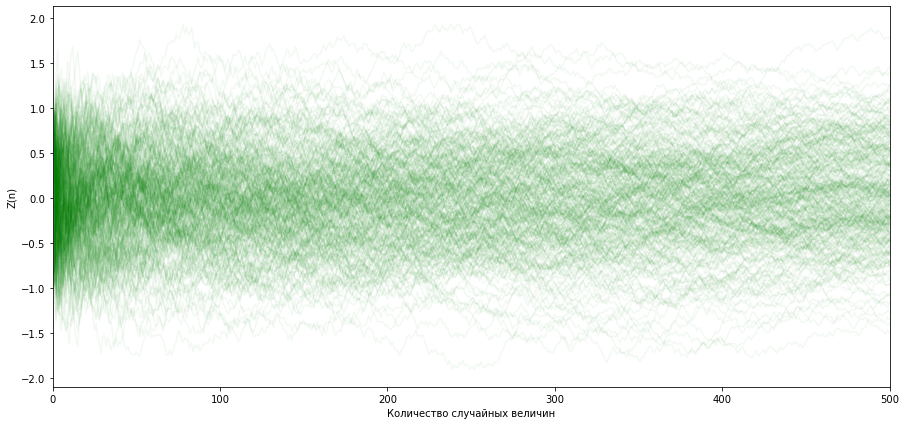

In [25]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, statistics[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Z(n)')
plt.xlim((0, size));

Значения $Z_{jn}$ не сходятся к какой-либо константе.

Для $n=500$ по выборке $Z_{1,500}, ..., Z_{300,500}$ постройте <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lecture4_means.html#3.-Когда-придет-мой-автобус?-Или-каково-среднее-время-ожидания-автобуса.">гистограмму и график плотности</a> распределения $\mathcal{N}(0, 1)$.  Не забудьте сделать легенду.

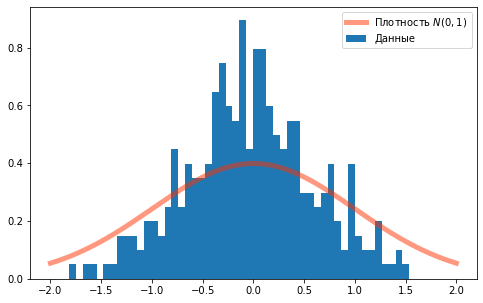

In [36]:
#grid = np.linspace(-10, count*tau+10, 1010)

plt.figure(figsize=(8, 5))
last = statistics[:,499]
plt.hist(last, bins=50, density=True, label='Данные')
grid = np.linspace(-2, 2, 1000)
plt.plot(grid, sps.norm.pdf(grid), lw=5, alpha=0.5, 
         label='Плотность $N(0, 1)$', color='#FF3300')
plt.legend()
plt.show()


Сделайте вывод о смысле свойства асимптотической нормальности. Подтверждают ли сделанные эксперименты теоретические свойства?

При выполнении достаточно общих технических условий оценка метода моментов асимптотически нормальна. Асимптотически нормальная оценка состоятельна. Проведенные эксперименты отличаются от теории. Так, например, значения на гистограмме по выборке $Z_{1,500}, ..., Z_{300,500}$ в среднем в два раза больше значений на графике плотности распределения $\mathcal{N}(0, 1)$.

----

## Задачи типа B (необходимо на "отл")

----
### Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. 

Пусть выборка $X_1, ... X_{100}$ имеет распределение $Bern(\theta)$. <a href="https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html">Сгенерируйте</a> такую выборку, взяв $\theta=1/2$. Для каждой подвыборке вида $X_1, ... X_i$, $1 \le i \le 100$ постройте асимптотический доверительный интервал для параметра $\theta$ уровня доверия $\alpha=0.95$. Формула для интервала была выведена на семинаре. Постройте график зависимости доверительного интервала от размера выборки (см. <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html">код с семинара</a>). 

Аналогичные действия выполните для выборки из распределения Лапласса с плотностью $p(x) = \frac{1}{2} e^{-|x-\theta|}$, сгенерировав выборку для $\theta=0$.

In [7]:
size_b = 100  # количество случайных величин

samples_b = sps.bernoulli(0.5).rvs(size = size_b)
print(samples_b)

[0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
def asymptotic_confidence_interval(data, confidence=0.95):
    ar = np.array(data)
    n = len(ar)
    x, se = np.mean(ar), sps.sem(ar)
    h = se * sps.t.ppf((1 + confidence) / 2., n-1)
    return x-h, x+h

In [11]:
left = []
right = []
for i in range(99):
    left.append(asymptotic_confidence_interval(samples_b[0:i+1])[0])
    right.append(asymptotic_confidence_interval(samples_b[0:i+1])[1])

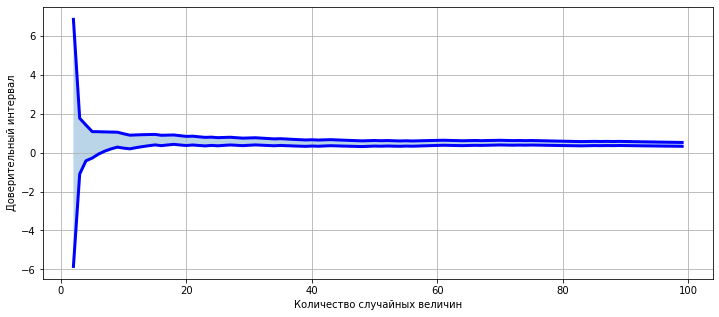

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(99) + 1, left, color='blue', lw=3)
plt.plot(np.arange(99) + 1, right, color='blue', lw=3)
plt.fill_between(np.arange(99) + 1, left, right, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Доверительный интервал')
plt.grid();

In [2]:
size_l = 100  # количество случайных величин

samples_l = sps.laplace.rvs(size = size_l)
print(samples_l)

[-0.10905862  0.88375613  1.89920534  1.068158    1.34012044 -0.35756518
  0.29831449 -1.41285804 -1.11209354  1.61462584  2.05925647 -0.56478669
  0.24548473  0.07441397 -1.00489188 -0.29827275 -1.97879625  0.78679459
 -0.19164503  0.76407601 -0.21009334  0.38831514 -3.87816882  2.31234103
  0.23677155 -1.21660136 -1.07702492  1.17730441  0.29110427 -1.21264818
 -0.22707591 -0.01556531  1.6195554   0.97473145  1.6530242   0.16391119
  0.47274616 -1.43143706 -0.38489792 -0.6171785  -0.66718229  0.83767048
 -2.02945389 -0.88995584 -0.9436976   0.61449851  4.10278792 -0.95923782
 -0.93738516  0.87128102 -0.08466009  0.15667465  3.00572154 -3.83840589
  0.44228833 -1.72431621 -0.04542561 -0.72899001 -0.24822009  0.36094546
  0.06121082  1.82339055  1.34104203 -1.14865102  4.40790709  0.14274821
 -0.34906069  0.42545412 -2.05045506 -0.37549131 -1.05706668 -0.0595042
  0.02482796 -0.21303373  2.67222681 -0.23692879 -0.87243489 -0.1059891
 -1.16117495 -3.93035415  0.18482146 -0.41037182 -0.5

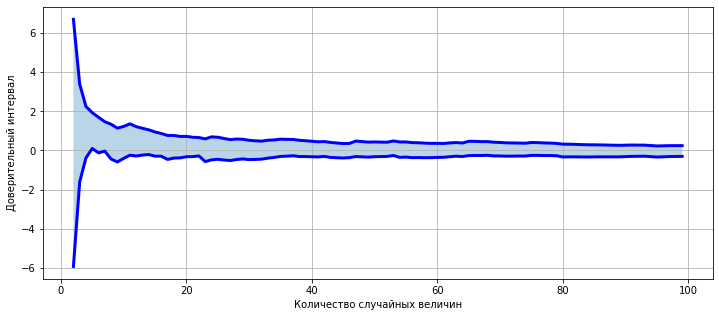

In [7]:
left_l = []
right_l = []
for i in range(99):
    left_l.append(asymptotic_confidence_interval(samples_l[0:i+1])[0])
    right_l.append(asymptotic_confidence_interval(samples_l[0:i+1])[1])
plt.figure(figsize=(12, 5))
plt.plot(np.arange(99) + 1, left_l, color='blue', lw=3)
plt.plot(np.arange(99) + 1, right_l, color='blue', lw=3)
plt.fill_between(np.arange(99) + 1, left_l, right_l, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Доверительный интервал')
plt.grid();

С ростом количества случайных величин асимптотический доверительный интервал уменьшается, что определяется знаменателем $\sqrt{n}$

__________________
### Задача 5

Если у вас еще не установлена <a href="https://mipt-stats.gitlab.io/courses/python/09_seaborn.html">библиотека `seaborn`</a> для получения красивых графиков, поставьте ее.

In [ ]:
import seaborn as sns
sns.set(font_scale=1.2, palette='Set2')

Загрузим данные <a target="_blank" href="https://ru.wikipedia.org/wiki/Ирисы_Фишера">"Ирисы Фишера"</a> о цветках ириса различных сортов и посмотрим на первые пять строк таблицы. Для хранения данных используется класс <a href="https://mipt-stats.gitlab.io/courses/python/08_pandas1.html#2.-Тип-данных-DataFrame">`DataFrame`</a> библиотеки <a href="https://mipt-stats.gitlab.io/courses/python/08_pandas1.html">`pandas`</a>.

In [ ]:
df = sns.load_dataset("iris")
df.head()

Столбцы отвечают за длину и ширину чашелистика и лепестка соответственно, а так же за тип цветка (setosa, virginica, versicolor).

Вектор значений первого столбца можно получить так

In [ ]:
df['sepal_length']

Первую строку можно получить так

In [ ]:
df.iloc[0]

Таблица с данными только по сорту virginica извлекается следующим образом

In [ ]:
df[df['species'] == 'virginica']

Визуализируем данные по двумерным проекциям. Цветом обозначен тип цветка.

In [ ]:
g = sns.PairGrid(df, hue='species', size=3)
g.map_offdiag(plt.scatter, cmap ="Blues_d")
g.map_diag(sns.kdeplot, lw=3)
plt.legend();

Для каждой характеристики цветка и каждого типа цветка проверьте с помощью <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html#Критерий-Шапиро-Уилка">критерия Шапиро-Уилка</a>, является ли соответствующая выборка нормальной с уровнем значимости $\alpha=0.05$. Всего нужно совешить 12 проверок (4 характеристики, 3 типа). Например, нужно проверить, является ли выборка `df[df['species'] == 'virginica']['sepal_length']` нормальной.

In [ ]:
<...>

Теперь для каждой характеристики для всех пар типов цветка проверьте с уровнем значимости $\alpha=0.05$, отличаются ли значения данной харатеристики для этих типов цветков. Если для обоих выборок нормальность выше не отверглась, используйте <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html#T-критерий%20Стьюдента%20—%20независимые%20выборки">критерий Стьюдента</a>, иначе пользуйтесь <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html#Критерий-Смирнова">критерием Смирнова</a>. Например, нужно проверить, отличаются ли распределения выборкок `df[df['species'] == 'setosa']['sepal_length']` и `df[df['species'] == 'virginica']['sepal_length']`.

*Замечание*. Для применения критерия Стьюдента было бы правильнее предварительно проверить, что дисперсии выборок совпадает, но в данном задании это можно не делать.

In [ ]:
<...>

**Вывод:** <...>

__________________
### Задача 6

Сколько проверок статистических гипотез пришлось совершить в предыдущей задачи?

<...>

Каким числом ограничена вероятность ошибки первого рода в каждой проверке?

<...>

Такую ошибку мы могли совершить в каждой проверке. Вероятность совершения хотя бы одной ошибки первого рода среди всех проверок не превосходит произведения указанных вами чисел. Но нам хотелось бы, чтобы вероятность совершения хотя бы одной ошибки первого рода не превосходила $\alpha=0.05$. Можете ли вы предложить решение данной проблемы?

<...>

Реализуйте этот способ для предыдущей задачи

In [ ]:
<...>

***Вывод:** <...>